In [109]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pickle
import joblib

from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

In [110]:
TRAIN_df=pd.read_csv('./TRAIN_df.csv')
TEST_df= pd.read_csv('./diamonds_test.csv')

In [111]:
TRAIN_df.drop(['Unnamed: 0'], inplace=True,axis=1)


In [112]:
TRAIN_df

,index_id,price,carat,color,clarity,city,cut,depth,table,x,y,z
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,4268,1.21,J,VS2,Kimberly,Premium,62.4,58.0,6.83,6.79,4.25
1,248aa2bdd0032920ac9e5f6ad36c350549da067efeaf7b...,4839,1.20,J,VS2,Kimberly,Premium,60.8,60.0,6.85,6.89,4.18
2,72b31cf00f8ab3967588fad4a32f61622cb162f9b7bc2c...,368,0.30,J,VS2,Kimberly,Premium,60.6,59.0,4.34,4.38,2.64
3,98c53df687f2e9b94da80eef5b9049f1fac456b4c41c80...,5053,1.20,J,VS2,Kimberly,Premium,62.6,57.0,6.80,6.72,4.23
4,5dfe43a321c6834c7de273c73aeadc705d919a5869e0f5...,3593,1.05,J,VS2,Kimberly,Premium,59.4,62.0,6.66,6.58,3.93
...,...,...,...,...,...,...,...,...,...,...,...,...
40450,ae8502b547dea0285938b80c225004b2bae4893f1fd22d...,893,0.58,F,I1,Paris,Fair,66.3,55.0,5.18,5.10,3.41
40451,b86a47eaf9d2b0cf4d6ccab66641ae9dad5a9ad4ea0891...,3734,1.51,F,I1,Paris,Fair,67.8,59.0,7.09,7.00,4.78
40452,d8470d878d49355e06ef439dc1c2c4502ed992623e4dc8...,2037,1.04,I,I1,Paris,Fair,67.3,56.0,6.34,6.23,4.22
40453,23c34d0a9557ec34e03ed4da729b05411ed33ee9b81ed0...,1440,0.37,D,IF,Paris,Fair,61.2,57.0,4.68,4.73,2.88


In [113]:
TRAIN_df['cut'].unique()

array(['Premium', 'Ideal', 'Good', 'Very Good', 'Fair'], dtype=object)

In [114]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for color_var in ['J', 'H', 'G', 'D', 'F', 'E', 'I']:
    TRAIN_df['color_cat'] = le.fit_transform(TRAIN_df['color'])
for clarity_var in ['VS2', 'VS1', 'SI1', 'VVS2', 'SI2', 'VVS1', 'I1', 'IF']:
    TRAIN_df['clarity_cat'] = le.fit_transform(TRAIN_df['clarity'])
for cut_var in ['Premium', 'Ideal', 'Good', 'Very Good', 'Fair']:
    TRAIN_df['cut_cat'] = le.fit_transform(TRAIN_df['cut'])

In [115]:
TRAIN_df

,index_id,price,carat,color,clarity,city,cut,depth,table,x,y,z,color_cat,clarity_cat,cut_cat
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,4268,1.21,J,VS2,Kimberly,Premium,62.4,58.0,6.83,6.79,4.25,6,5,3
1,248aa2bdd0032920ac9e5f6ad36c350549da067efeaf7b...,4839,1.20,J,VS2,Kimberly,Premium,60.8,60.0,6.85,6.89,4.18,6,5,3
2,72b31cf00f8ab3967588fad4a32f61622cb162f9b7bc2c...,368,0.30,J,VS2,Kimberly,Premium,60.6,59.0,4.34,4.38,2.64,6,5,3
3,98c53df687f2e9b94da80eef5b9049f1fac456b4c41c80...,5053,1.20,J,VS2,Kimberly,Premium,62.6,57.0,6.80,6.72,4.23,6,5,3
4,5dfe43a321c6834c7de273c73aeadc705d919a5869e0f5...,3593,1.05,J,VS2,Kimberly,Premium,59.4,62.0,6.66,6.58,3.93,6,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,ae8502b547dea0285938b80c225004b2bae4893f1fd22d...,893,0.58,F,I1,Paris,Fair,66.3,55.0,5.18,5.10,3.41,2,0,0
40451,b86a47eaf9d2b0cf4d6ccab66641ae9dad5a9ad4ea0891...,3734,1.51,F,I1,Paris,Fair,67.8,59.0,7.09,7.00,4.78,2,0,0
40452,d8470d878d49355e06ef439dc1c2c4502ed992623e4dc8...,2037,1.04,I,I1,Paris,Fair,67.3,56.0,6.34,6.23,4.22,5,0,0
40453,23c34d0a9557ec34e03ed4da729b05411ed33ee9b81ed0...,1440,0.37,D,IF,Paris,Fair,61.2,57.0,4.68,4.73,2.88,0,1,0


In [116]:
TRAIN_df.drop(['color','clarity','city','cut','index_id'], inplace=True,axis=1)

In [117]:
TRAIN_df

,price,carat,depth,table,x,y,z,color_cat,clarity_cat,cut_cat
0,4268,1.21,62.4,58.0,6.83,6.79,4.25,6,5,3
1,4839,1.20,60.8,60.0,6.85,6.89,4.18,6,5,3
2,368,0.30,60.6,59.0,4.34,4.38,2.64,6,5,3
3,5053,1.20,62.6,57.0,6.80,6.72,4.23,6,5,3
4,3593,1.05,59.4,62.0,6.66,6.58,3.93,6,5,3
...,...,...,...,...,...,...,...,...,...,...
40450,893,0.58,66.3,55.0,5.18,5.10,3.41,2,0,0
40451,3734,1.51,67.8,59.0,7.09,7.00,4.78,2,0,0
40452,2037,1.04,67.3,56.0,6.34,6.23,4.22,5,0,0
40453,1440,0.37,61.2,57.0,4.68,4.73,2.88,0,1,0


In [118]:
TEST_df.drop(['city','id'], inplace=True,axis=1)

In [119]:
TEST_df

,carat,cut,color,clarity,depth,table,x,y,z
0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67
1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18
2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57
3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90
4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19
...,...,...,...,...,...,...,...,...,...
13480,0.57,Ideal,E,SI1,61.9,56.0,5.35,5.32,3.30
13481,0.71,Ideal,I,VS2,62.2,55.0,5.71,5.73,3.56
13482,0.70,Ideal,F,VS1,61.6,55.0,5.75,5.71,3.53
13483,0.70,Very Good,F,SI2,58.8,57.0,5.85,5.89,3.45


In [120]:
for color_var in ['J', 'H', 'G', 'D', 'F', 'E', 'I']:
    TEST_df['color_cat'] = le.fit_transform(TEST_df['color'])
for clarity_var in ['VS2', 'VS1', 'SI1', 'VVS2', 'SI2', 'VVS1', 'I1', 'IF']:
    TEST_df['clarity_cat'] = le.fit_transform(TEST_df['clarity'])
for cut_var in ['Premium', 'Ideal', 'Good', 'Very Good', 'Fair']:
    TEST_df['cut_cat'] = le.fit_transform(TEST_df['cut'])

In [121]:
TEST_df.drop(['color','clarity','cut'], inplace=True,axis=1)

In [122]:
#PROBAR ONE HOT ENCONDING, PERO QUIZÁ NO EN TODAS. OBJETIVO=500 
#MIRAR SCALING Y PONERLO EN FUNCION DE 1(VARIANZA)
#COGER LOGARITMOS
#.clip para que no coja numeros negativos en la prediccion
#cross validation

In [123]:
TEST_df

,carat,depth,table,x,y,z,color_cat,clarity_cat,cut_cat
0,0.79,62.7,60.0,5.82,5.89,3.67,2,2,4
1,1.20,61.0,57.0,6.81,6.89,4.18,6,4,2
2,1.57,62.2,61.0,7.38,7.32,4.57,4,2,3
3,0.90,63.8,54.0,6.09,6.13,3.90,2,2,4
4,0.50,62.9,58.0,5.05,5.09,3.19,2,4,4
...,...,...,...,...,...,...,...,...,...
13480,0.57,61.9,56.0,5.35,5.32,3.30,1,2,2
13481,0.71,62.2,55.0,5.71,5.73,3.56,5,5,2
13482,0.70,61.6,55.0,5.75,5.71,3.53,2,4,2
13483,0.70,58.8,57.0,5.85,5.89,3.45,2,3,4


array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'table'}>],
       [<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>,
        <AxesSubplot:title={'center':'z'}>],
       [<AxesSubplot:title={'center':'color_cat'}>,
        <AxesSubplot:title={'center':'clarity_cat'}>,
        <AxesSubplot:title={'center':'cut_cat'}>]], dtype=object)

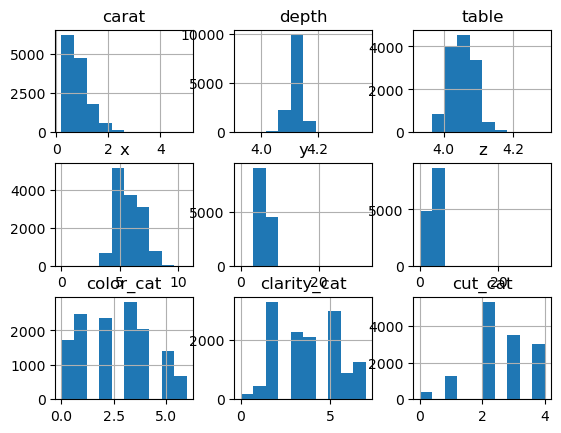

In [138]:
TEST_df.hist()

In [124]:
TEST_df['table'] = np.log(TEST_df['table'])
TEST_df['depth']=np.log(TEST_df['depth'])
TEST_df

,carat,depth,table,x,y,z,color_cat,clarity_cat,cut_cat
0,0.79,4.138361,4.094345,5.82,5.89,3.67,2,2,4
1,1.20,4.110874,4.043051,6.81,6.89,4.18,6,4,2
2,1.57,4.130355,4.110874,7.38,7.32,4.57,4,2,3
3,0.90,4.155753,3.988984,6.09,6.13,3.90,2,2,4
4,0.50,4.141546,4.060443,5.05,5.09,3.19,2,4,4
...,...,...,...,...,...,...,...,...,...
13480,0.57,4.125520,4.025352,5.35,5.32,3.30,1,2,2
13481,0.71,4.130355,4.007333,5.71,5.73,3.56,5,5,2
13482,0.70,4.120662,4.007333,5.75,5.71,3.53,2,4,2
13483,0.70,4.074142,4.043051,5.85,5.89,3.45,2,3,4


In [125]:
X=TRAIN_df[['carat','depth','table','x','y','z','color_cat','clarity_cat','cut_cat']]
y=TRAIN_df['price']



In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
model = LinearRegression()
hyperparameters = model.get_params()


In [128]:
model.fit(X_train, y_train)
y_train_pred=model.predict(X_train)

In [129]:
#PREDICCIONES QUE HAGO YA SOBRE EL TEST DE KAGGLE
predictions = model.predict(TEST_df)


In [130]:
print(predictions)

[16751.66347687 19521.19926694 22785.79706106 ... 16178.17767845
 16025.33775006 14191.45074733]


In [131]:
len(predictions)

13485

In [132]:
Submit1 = pd.DataFrame(predictions,columns=['price']).reset_index().rename(columns={'index':'id'})

In [133]:
Submit1

,id,price
0,0,16751.663477
1,1,19521.199267
2,2,22785.797061
3,3,17624.768923
4,4,14983.495888
...,...,...
13480,13480,14893.953177
13481,13481,15876.525352
13482,13482,16178.177678
13483,13483,16025.337750


In [136]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mean_squared_error(y_train_pred, y_train)
rmse = mean_squared_error(y_train_pred,y_train, squared=False)
rmse

1350.5914298636653

In [135]:
Submit1.to_csv('./Submit1.csv',index=False)